In [10]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from copy import deepcopy
import pyhf
import eos
import matplotlib.pyplot as plt
from redist import modifier
from redist import plot
import knunu_utils 
import ksnunu_utils 

# Combining $B \to K \nu \nu$ and $B \to K^* \nu \nu$ in terms of the WET

In [11]:
files       = ['knunu_model.json', 'ksnunu_model.json']
alt_dists   = [knunu_utils.alt_pred().distribution, ksnunu_utils.alt_pred().distribution]
null_dists  = [knunu_utils.null_pred().distribution, ksnunu_utils.null_pred().distribution]


model, data = modifier.combine(files, alt_dists, null_dists, return_data=True)

In [12]:
fixed = model.config.suggested_fixed()
fixed[model.config.par_map['mu']['slice']] = [True]

# pyhf.set_backend("numpy", pyhf.optimize.scipy_optimizer())
# best_fit = pyhf.infer.mle.fit(data, model, fixed_params=fixed)
pyhf.set_backend("numpy", pyhf.optimize.minuit_optimizer(verbose=True, strategy=2))
best_fit, twice_nll, OptimizeResult = pyhf.infer.mle.fit(
    data,
    model,
    fixed_params=fixed,
    return_uncertainties=True,
    return_fitted_val=True,
    return_result_obj=True
    )

best_fit_dict = modifier.par_dict(model, best_fit)
best_fit_dict


W MnPosDef Matrix forced pos-def by adding to diagonal 1.76156
W DavidonErrorUpdator delgam < 0 : first derivatives increasing along search line
W VariableMetricBuilder Matrix not pos.def, gdel = 75044.6 > 0
W MnPosDef non-positive diagonal element in covariance matrix[ 36 ] = -0.0108837
W MnPosDef non-positive diagonal element in covariance matrix[ 38 ] = -0.00228381
W MnPosDef non-positive diagonal element in covariance matrix[ 41 ] = -0.00505998
W MnPosDef Added to diagonal of Error matrix a value 0.510885
W VariableMetricBuilder gdel = -2.62464e+10
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder Iterations finish without convergence; Edm 346956 Requested 0.0002
W MnPosDef non-positive diagonal element in covariance matrix[ 35 ] = -6839.59
W MnPosDef non-positive diagonal element in covariance matrix[ 37 ] = -2582.3
W MnPosDef non-positive diagonal element in covariance matrix[ 40 ] = -1242.73
W MnPosDef Added to diagonal of Error matrix a value 6840.09

{'cvl': array([5.07667291, 0.31582267]),
 'cvr': array([0.48327568, 0.31681639]),
 'csl': array([0.90429471, 4.00658637]),
 'csr': array([1.00498836, 2.93418209]),
 'ctl': array([1.00458739, 0.02307264]),
 'FFK_decorrelated[0]': array([0.27574089, 0.95071453]),
 'FFK_decorrelated[1]': array([0.4036098 , 0.80820216]),
 'FFK_decorrelated[2]': array([-0.07151617,  1.10104719]),
 'FFK_decorrelated[3]': array([0.02543056, 0.99344448]),
 'FFK_decorrelated[4]': array([0.13059508, 0.98298252]),
 'FFK_decorrelated[5]': array([-0.0868045 ,  1.01199296]),
 'FFK_decorrelated[6]': array([0.02825237, 0.99370934]),
 'FFK_decorrelated[7]': array([0.04648177, 0.99755956]),
 'mu': array([1., 0.]),
 'stat': [[1.0027923779423997, 0.00534131993516529],
  [0.9958168081434637, 0.004737814922529671],
  [0.9984240663450212, 0.005340269298139466],
  [1.0002100188704306, 0.006129314478276304],
  [1.0031641406538854, 0.006972695912587978],
  [1.0008908790803137, 0.00825476982031731],
  [1.0029723077020811, 0.0101

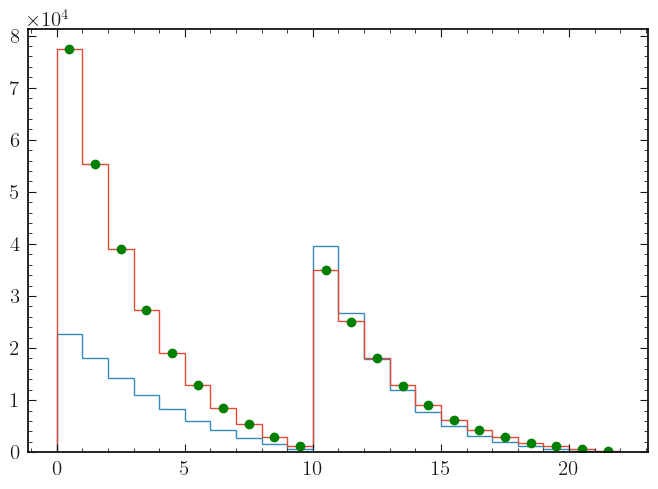

In [18]:
plt.stairs(model.expected_actualdata(model.config.suggested_init()))
plt.stairs(model.expected_actualdata(best_fit[:,0]))
x = np.linspace(0.5, 21.5, 22)
plt.plot(x, data[:22], 'og')